### Gradient Descent Algorithm
In this section, we will implement the gradient descent algorithm with NumPy framework, which is a very popular and efficient library for scientific computing. Consider the following function of f(x), $x ~ (2)$ in which the domain of x is [0, 10]:
$$
f(x) = sin(x_1) * cos(x_2) + sin(0.5x_1) * cos(0.5x_2)
$$
The proceeding steps are as follows:
1. Implement the function in a vectorized way, i.e., given a matrix X, it should return a vector of f(X) ~ (n).
2. Implement another function to compute its gradient (hard-coded).
3. Write a basic gradient descent procedure and visualize the paths taken by the optimization process from multiple starting points.
4. Try adding a momentum term and visualizing the norm of the gradients, which should converge to zero as the algorithm moves towards a stationery point.

In [7]:
# read the database
import pandas as pd

df = pd.read_csv('random_real_values_within_domain.csv')
X = df[['Column1', 'Column2']].values
X[:5]

array([[8.77373072, 7.40768618],
       [6.97015741, 7.02484084],
       [3.59491151, 2.93591844],
       [8.09361155, 8.10113395],
       [8.67072319, 9.13240553]])

#### 1. Vectorizing 

In [18]:
import numpy as np

def vectorize_f(X):
    first_term = np.sin(X[:, 0]) * np.cos(X[:, 1])
    second_term = np.sin(0.5 * X[:, 0]) + np.cos(0.5 * X[:, 1])
    return first_term + second_term

f = vectorize_f(X)
print(f.shape)
print(f'Vectorized Function F(X) = \n {f[:10]}')

(100,)
Vectorized Function F(X) = 
 [-1.53196659 -0.80117181  1.50579959 -1.6387653  -1.73097669 -0.5280696
 -0.77679869 -1.09908688 -1.57148796  1.50481828]


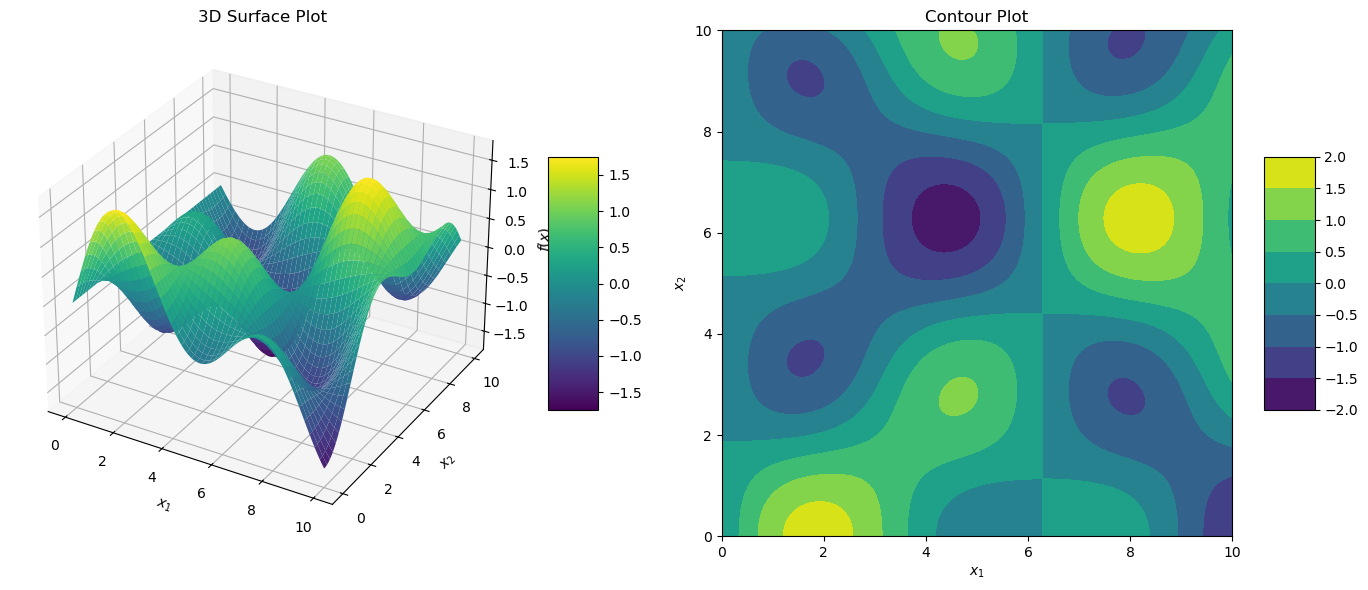

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x1, x2):
    return np.sin(x1) * np.cos(x2) + np.sin(0.5 * x1) * np.cos(0.5 * x2)

x1 = np.linspace(0, 10, 400)
x2 = np.linspace(0, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = f(X1, X2)

# Plot the 3D surface
fig = plt.figure(figsize=(14, 6))

# 3D surface plot
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('3D Surface Plot')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, cmap='viridis')
fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Contour Plot')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

plt.tight_layout()
plt.show()

#### 2. Gradient of the function

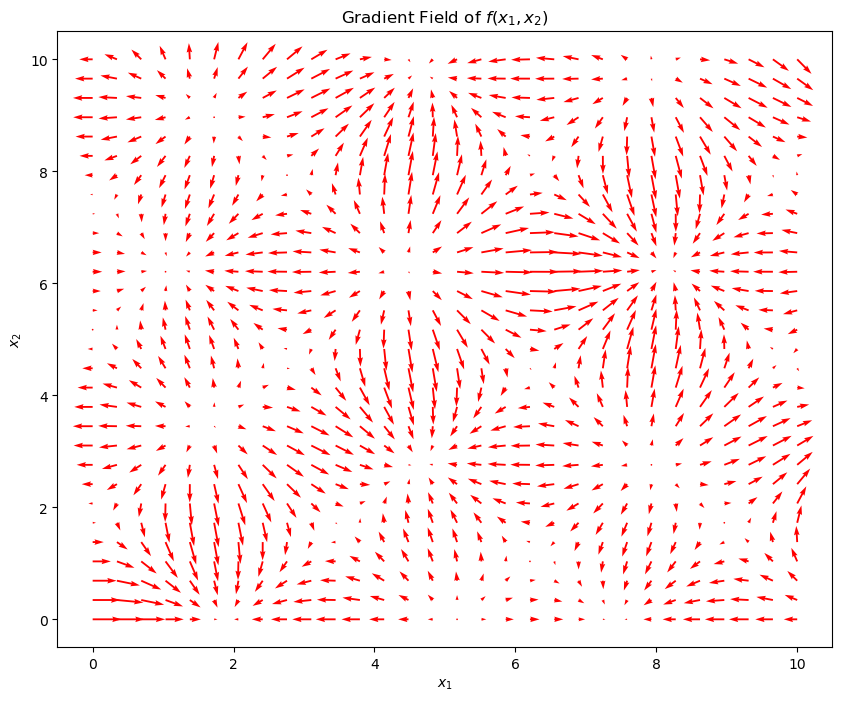

In [44]:
# Define the partial derivatives
def df_dx1(x1, x2):
    return np.cos(x1) * np.cos(x2) + 0.5 * np.cos(0.5 * x1) * np.cos(0.5 * x2)

def df_dx2(x1, x2):
    return -np.sin(x1) * np.sin(x2) - 0.5 * np.sin(0.5 * x1) * np.sin(0.5 * x2)

# Compute the gradient field
x1 = np.linspace(0, 10, 30)
x2 = np.linspace(0, 10, 30)
X1, X2 = np.meshgrid(x1, x2)
dX1 = df_dx1(X1, X2)
dX2 = df_dx2(X1, X2)

# Plot the gradient field
plt.figure(figsize=(10, 8))
plt.quiver(X1, X2, dX1, dX2, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Field of $f(x_1, x_2)$')
plt.show()

#### 3. Gradient Descent Procedure
We begin by defining the learning rate and number of iterations. We then initialize the starting point for our optimization process. Then, we will visualize the norm of the gradients as the algorithm progresses towards a minimum. Finally, we will plot the path that gradient descent takes from its initial point to a global minimum.

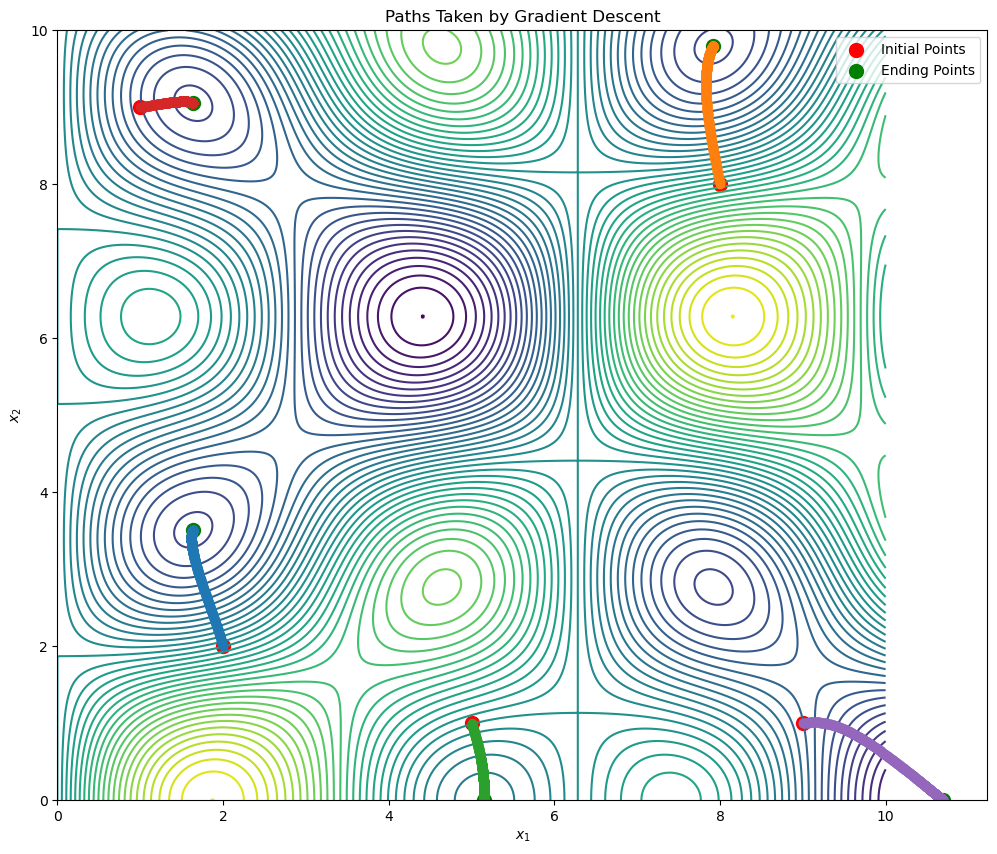

In [50]:
# Define the Gradient Descent Function
def gradient_descent(f, df_dx1, df_dx2, x0, learning_rate=0.01, max_iter=1000, tol=1e-6):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    for _ in range(max_iter):
        grad = np.array([df_dx1(*x), df_dx2(*x)])
        x -= learning_rate * grad
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path)

# Define starting points
starting_points = [[2, 2], [8, 8], [5, 1], [1, 9], [9, 1]]

# Perform gradient descent from each starting point
paths = [gradient_descent(f, df_dx1, df_dx2, x0) for x0 in starting_points]

# Plot the function and the paths taken by gradient descent
x1 = np.linspace(0, 10, 500)
x2 = np.linspace(0, 10, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
plt.figure(figsize=(12, 10))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
for path in paths:
    plt.plot(path[:, 0], path[:, 1], marker='o')
    
# Plot the initial points and final points of each path
initial_points = [path[0] for path in paths]
ending_points = [path[-1] for path in paths]

plt.scatter([p[0] for p in initial_points], [p[1] for p in initial_points], color='red', label='Initial Points', s=100)
plt.scatter([p[0] for p in ending_points], [p[1] for p in ending_points], color='green', label='Ending Points', s=100)
    
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Paths Taken by Gradient Descent')
plt.legend()
plt.show()

### Using JAX Framework


In [57]:
import jax.numpy as jnp

# Define the function
def f(X):
    x1 ,x2 = X
    return jnp.sin(x1) * jnp.cos(x2) + jnp.sin(0.5 * x1) * jnp.cos(0.5 * x2)

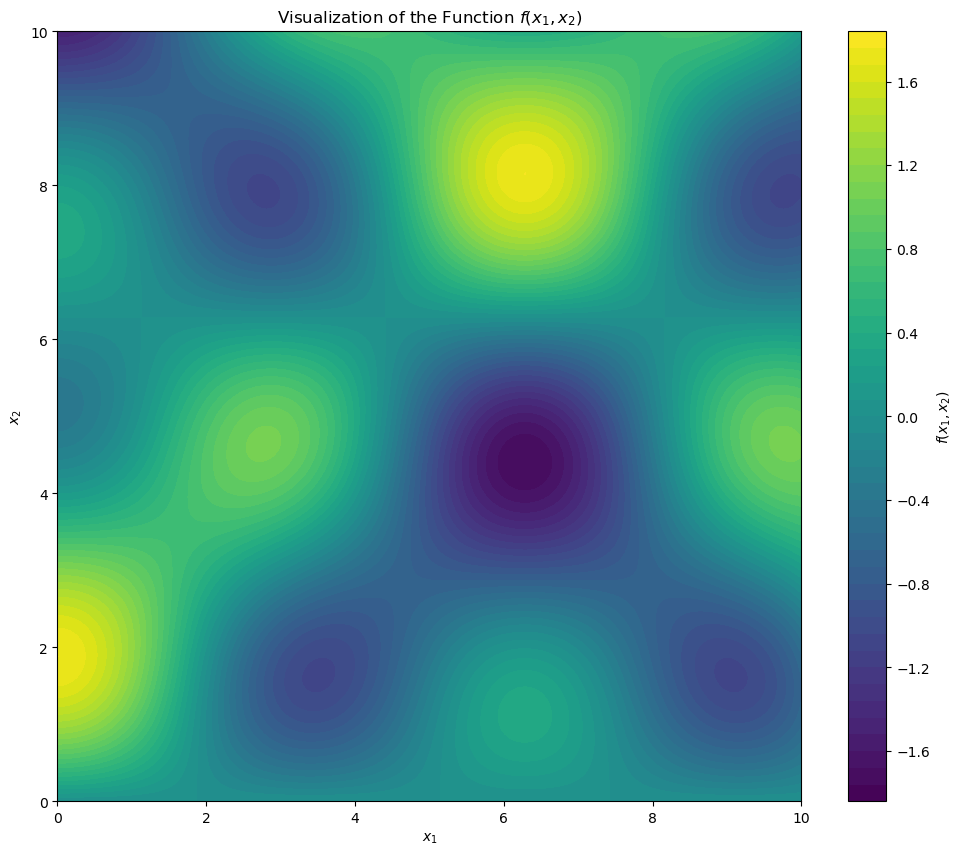

In [65]:
import matplotlib.pyplot as plt
from jax import vmap

# Create a meshgrid
x1 = jnp.linspace(0, 10, 400)
x2 = jnp.linspace(0, 10, 400)
X1, X2 = jnp.meshgrid(x1, x2)

# Vectorize the function for plotting
f_vectorized = vmap(vmap(lambda x1, x2: f(jnp.array([x1, x2])), (None, 0)), (0, None))
Z = f_vectorized(x1, x2)

# Plot the function
plt.figure(figsize=(12, 10))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='$f(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Visualization of the Function $f(x_1, x_2)$')
plt.show()

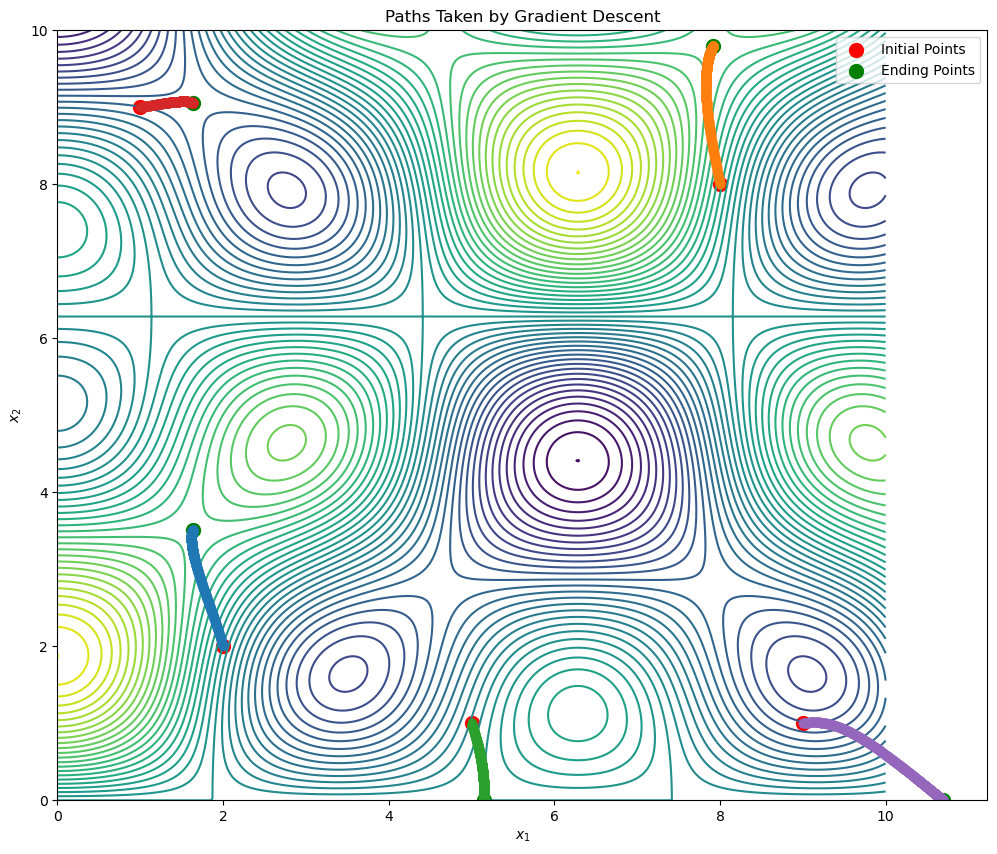

In [66]:
import jax
from jax import grad

# Compute the gradient of the function with respect to x
grad_f = grad(f)

# Define the gradient descent function
def gradient_descent(x0, learning_rate=0.01, max_iter=1000, tol=1e-6):
    x = jnp.array(x0, dtype=float)
    path = [x.copy()]
    for _ in range(max_iter):
        grad_value = grad_f(x)
        x = x - learning_rate * grad_value
        path.append(x.copy())
        if jnp.linalg.norm(grad_value) < tol:
            break
    return jnp.array(path)

# Define starting points
starting_points = [[2, 2], [8, 8], [5, 1], [1, 9], [9, 1]]

# Perform gradient descent from each starting point
paths = [gradient_descent(x0) for x0 in starting_points]

# Plot the function and the paths taken by gradient descent
plt.figure(figsize=(12, 10))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
for path in paths:
    plt.plot(path[:, 0], path[:, 1], marker='o')
    
# Plot the initial points and final points of each path
initial_points = [path[0] for path in paths]
ending_points = [path[-1] for path in paths]

plt.scatter([p[0] for p in initial_points], [p[1] for p in initial_points], color='red', label='Initial Points', s=100)
plt.scatter([p[0] for p in ending_points], [p[1] for p in ending_points], color='green', label='Ending Points', s=100)
    
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Paths Taken by Gradient Descent')
plt.legend()
plt.show()
